<a href="https://colab.research.google.com/github/nana-hyun/Machine-Learning/blob/master/ML%20%26%20DL%20Basic/Lecture_04_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Multivariable linear regression

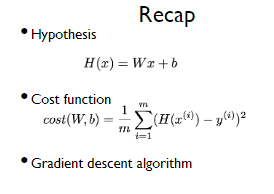

앞선 강의에서는 one variable - one feature 였다면,

이번에는 변수가 많은 경우에 linear regression을 어떻게 진행할 지 알아보고자 한다.

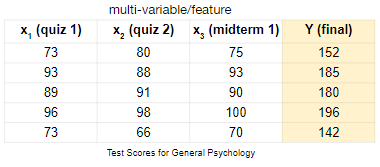

다음과 같이 quiz에 대해 3개의 변수가 주어진다면, 어떻게 예측을 할 수 있을까?

**Hypothesis**

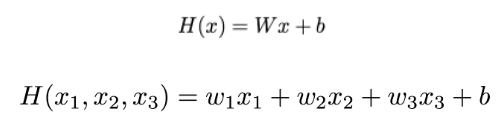

hypothesis를 위와 같이 쓸 수 있다면 cost function은 어떻게 만들까?

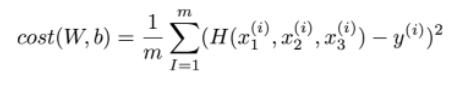

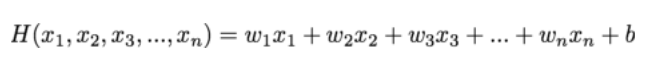

변수가 n개라면 위와 같이 쓸 수 있을 것이다.


이러한 경우, 계산을 간단히 하기 위해 행렬곱의 특성을 활용한다.

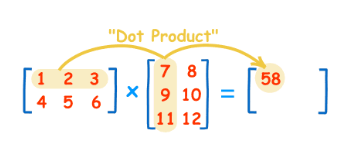

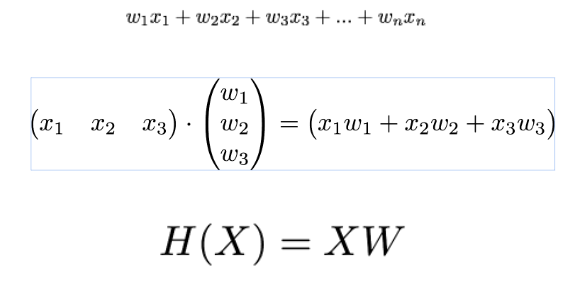



## Lab 4

In [43]:
import tensorflow.compat.v1 as tf

tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

In [3]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)


In [4]:

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

In [5]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [6]:
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [7]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  77437.836 
Prediction:
 [ -99.19784 -109.40472 -112.99919 -123.97137  -79.7757 ]
10 Cost:  10.199746 
Prediction:
 [146.96669 186.4446  178.51767 193.48209 145.8782 ]
20 Cost:  9.441347 
Prediction:
 [147.72311 187.33174 179.40324 194.44539 146.55028]
30 Cost:  9.392073 
Prediction:
 [147.737   187.32648 179.40944 194.45108 146.54167]
40 Cost:  9.343043 
Prediction:
 [147.74861 187.31851 179.41296 194.45387 146.53104]
50 Cost:  9.294317 
Prediction:
 [147.76016 187.31058 179.41647 194.45665 146.52042]
60 Cost:  9.245825 
Prediction:
 [147.77168 187.30264 179.41997 194.4594  146.50981]
70 Cost:  9.197584 
Prediction:
 [147.78317 187.29472 179.42346 194.46214 146.49924]
80 Cost:  9.149622 
Prediction:
 [147.79466 187.28687 179.42696 194.46492 146.48872]
90 Cost:  9.101915 
Prediction:
 [147.80608 187.27899 179.43044 194.46764 146.4782 ]
100 Cost:  9.054459 
Prediction:
 [147.81749 187.27113 179.43388 194.47037 146.46773]
110 Cost:  9.007273 
Prediction:
 [147.82886 187.26334 179

In [3]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

AttributeError: ignored

In [9]:

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b


In [10]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)


In [11]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)


0 Cost:  105818.29 
Prediction:
 [[-133.5243 ]
 [-164.79396]
 [-160.21033]
 [-174.73904]
 [-126.3673 ]]
10 Cost:  8.311992 
Prediction:
 [[154.21866]
 [181.07106]
 [180.56628]
 [196.35913]
 [137.44464]]
20 Cost:  7.304976 
Prediction:
 [[155.07901]
 [182.12457]
 [181.59424]
 [197.47952]
 [138.25221]]
30 Cost:  7.266832 
Prediction:
 [[155.07141]
 [182.13478]
 [181.59424]
 [197.4805 ]
 [138.264  ]]
40 Cost:  7.2288847 
Prediction:
 [[155.0612 ]
 [182.14182]
 [181.59114]
 [197.4781 ]
 [138.27338]]
50 Cost:  7.1911535 
Prediction:
 [[155.05101]
 [182.14882]
 [181.58804]
 [197.4757 ]
 [138.2827 ]]
60 Cost:  7.153601 
Prediction:
 [[155.04085]
 [182.1558 ]
 [181.58495]
 [197.47328]
 [138.292  ]]
70 Cost:  7.1162896 
Prediction:
 [[155.0307 ]
 [182.16277]
 [181.58185]
 [197.4709 ]
 [138.30127]]
80 Cost:  7.0791917 
Prediction:
 [[155.0206 ]
 [182.1697 ]
 [181.57877]
 [197.4685 ]
 [138.31052]]
90 Cost:  7.0422525 
Prediction:
 [[155.01053]
 [182.17665]
 [181.57573]
 [197.46616]
 [138.31976]]


In [4]:
# in tf2

import tensorflow as tf
import numpy as np

x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3))  # input_dim=3 gives multi-variable regression
tf.model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default
# advanced reading https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:

history = tf.model.fit(x_data, y_data, epochs=100)

y_predict = tf.model.predict(np.array([[72., 93., 90.]]))
print(y_predict)

Epoch 1/100
1/1 [==============================] - 0s 450ms/step - loss: 72680.4844
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 22784.6582
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 7144.9639
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 2242.7493
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 706.1646
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 224.5269
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 73.5576
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 26.2362
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4027
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7524
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 5.2939
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 4.8360
Epoch 13/100
1/1 [===============

**Slicing**

In [4]:
nums = list(range(5))

print(nums)
print(nums[2:4])
print(nums[2:])
print(nums[:])
print(nums[:-1])
nums[2:4] = [8,9]
print(nums)

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


In [6]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

In [9]:
xy = np.loadtxt('/content/drive/MyDrive/data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [10]:
# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [11]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [173.58476]
 [173.19955]
 [165.64278]
 [156.87561]
 [192.32863]]
160 Cost: 17.202673 
Prediction:
 [[154.33728]
 [185.21562]
 [182.78679]
 [198.64517]
 [141.29272]
 [103.00073]
 [147.7702 ]
 [108.37877]
 [172.26244]
 [158.26694]
 [142.71352]
 [140.27492]
 [189.411  ]
 [157.98131]
 [148.31992]
 [187.51398]
 [150.88075]
 [177.35336]
 [180.68579]
 [161.51122]
 [173.59348]
 [173.2069 ]
 [165.64796]
 [156.84926]
 [192.32431]]
170 Cost: 17.114317 
Prediction:
 [[154.32806]
 [185.21664]
 [182.78094]
 [198.64609]
 [141.29048]
 [103.01175]
 [147.77834]
 [108.39487]
 [172.2751 ]
 [158.29585]
 [142.71748]
 [140.28696]
 [189.39769]
 [157.96063]
 [148.3307 ]
 [187.52084]
 [150.85596]
 [177.36494]
 [180.67007]
 [161.49718]
 [173.60216]
 [173.21417]
 [165.65314]
 [156.82301]
 [192.32   ]]
180 Cost: 17.026712 
Prediction:
 [[154.31888 ]
 [185.21764 ]
 [182.77512 ]
 [198.64703 ]
 [141.28825 ]
 [103.022705]
 [147.78647 ]
 [108.4109  ]
 [172.28769 ]
 [158.32465 ]
 [14

In [1]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/data/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [2]:

tf.model = tf.keras.Sequential()
# activation function doesn't have to be added as a separate layer. Add it as an argument of Dense() layer
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='linear'))
# tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.summary()

tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
history = tf.model.fit(x_data, y_data, epochs=2000)
# Ask my score
print("Your score will be ", tf.model.predict([[100, 70, 101]]))
print("Other scores will be ", tf.model.predict([[60, 70, 110], [90, 100, 80]]))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 291ms/step - loss: 5655.1777
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 2111.6221
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 801.4592
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 317.0436
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 137.9296
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 71.6944
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 47.1933
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 38.1226
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 34.7569
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 33.5006
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 33.0241
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 32.8360
Epoch 13/2000
1/1 [====================

# 5. Logistic regression classification

**Classification**

특히 binary의 경우에서, 0과 1로 encoding할 수 있다.

* Spam Detection : Spam(1) or ham(0)
* Facebook feed : show(1) or hide(0)
* Credit Card Fraudulent Transaction detection : legitimate(0)/fraud(1)

*Radiology*

Malignant tumor vs Benign tumor

*Finance*

When to sell vs When to buy

만약에, study hours에 따라 Pass(1) / Fail(0)이 구분되는 경우,

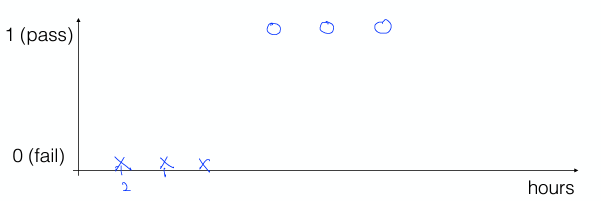

위와 같은 그래프가 그려진다고 해보자.

우리가 배운 linear regression을 이용해 classification할 수 있는데,

**H(x) = Wx + b**

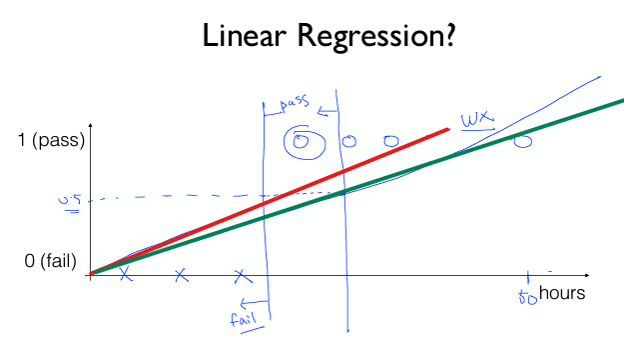

빨간색 선을 그려서 0.5를 기준으로 pass와 fail을 나눌 수 있겠지만,

만일 pass의 instance가 많아져 초록색과 같이 선이 그려지게 되면, 0.5의 위치가 뒤로 밀려나게 되면서 pass임에도 불구하고 fail로 분류되는 경우가 발생한다.


게다가 우리는 0과 1의 값을 가지는데, linear regression의 hypothesis는 1보다 크거나, 0보다 작은 값을 가질 수 있다.

ex) 

x = 100일때, W = 0.5, b = 0 이라고 한다면,

H(x) = 50의 값을 가진다.

이러한 경우를 보완해주기 위해 우리는 Logistic Hypothesis를 이용한다.



## hypothesis

기존의 H(x) = Wx + b를 z라고 두고, 범위가 0~1로 제한되어 있는 g(z)라는 함수를 새로 만들어 보자.

이때 이용할 g(z)는 **sigmoid** 함수 이다.

**sigmoid**

: curved in two directions, like the letter "S", or the Greek ς (sigma)

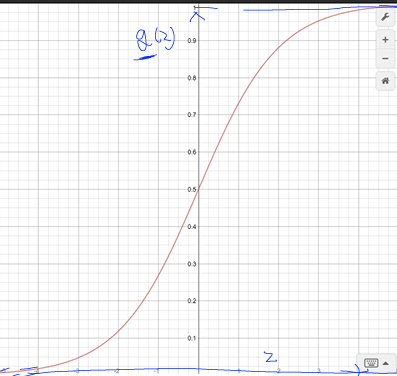

위 함수를 logistic function, sigmoid function이라 한다.

식은 다음과 같다.

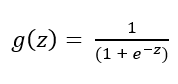

이를 이용해 hypothesis를 다시 작성하면,

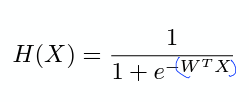

위와 같은 식을 가진다.

W transpose의 의미는, X행렬과 행렬곱이 안되는 경우, 즉 x shape = (1, D)인데, W = (1, D) 인 경우에 transpose하여 사용하면 된다.

그렇지 않을 경우 W를 transpose하지 않아도 무방하다.


## Cost function



cost function이 linear regression의 경우 다음과 같이 보여졌었다. 


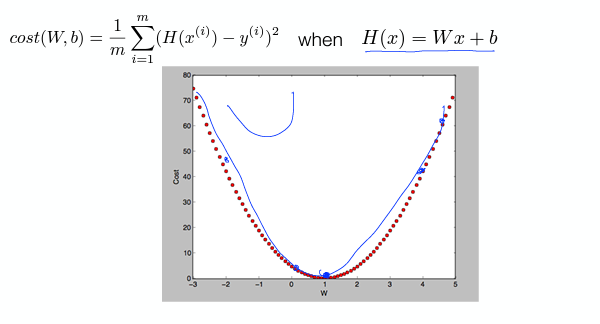



그렇다면 logistic regression의 경우 cost function이 어떻게 그려지게 될까?

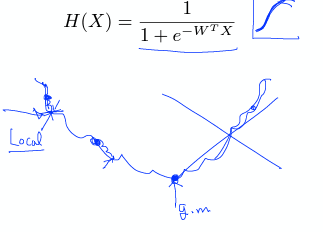

위와 같은 그림이 그려지는데, 이때 local minimum들 때문에, 시작점에 따라 최솟값이 달라지게 된다.

이렇게 되면 운이 좋게 진짜 global minimum에 도달하지 않는 이상 local minimum을 global minimum이라 생각할 수도 있게 된다.

따라서 이를 위해 새로운 cost함수를 만들 필요가 있다.

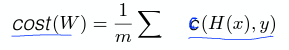

이때 c(H(x),y)는 y = 1일 때와 y = 0일때로 나눠서 다르게 작성할 수 있다.

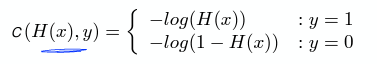



**y=1일때**

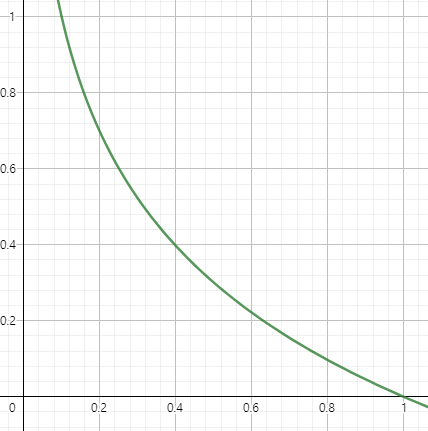

* H(x) = 1 -> cost(1) =0
* H(x) = 0 -> cost(0) =inf

**y=0일때**

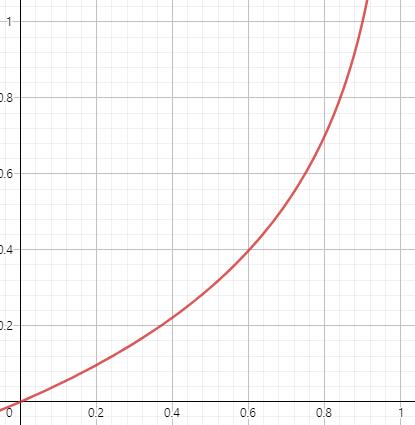


* H(x) = 0 -> cost(0) =0
* H(x) = 1 -> cost(1) =inf


우리가 코딩을 할 때에는 저렇게 식이 나눠져있으면 코드를 작성하기에 굉장히 어렵기 때문에, 식을 하나로 합쳐주면 다음과 같은 식이 된다.

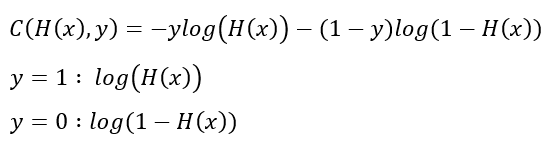

## Gradient descent alogrithm




Minimize cost - gradient descent alogrithm

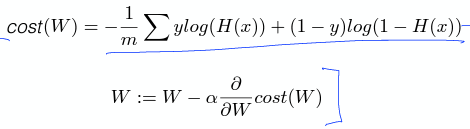

cost함수만 다르고, gradient descent algorithm은 똑같이 적용하면 된다.



In [ ]:
# in tf1

cost = tf.reduce_mean(-tf.reduce_suum(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis)))

# Minimize

a = tf.Variable(0.1) #learning rate
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)


## Lab 5

In [2]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [3]:
# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))


In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 0.7430492
200 0.42184696
400 0.38231477
600 0.35910192
800 0.34285858
1000 0.33000973
1200 0.31902754
1400 0.30919817
1600 0.30016214
1800 0.2917262
2000 0.28377867
2200 0.2762507
2400 0.26909587
2600 0.2622808
2800 0.25577927
3000 0.24956988
3200 0.24363394
3400 0.23795491
3600 0.23251796
3800 0.2273091
4000 0.22231568
4200 0.21752577
4400 0.21292806
4600 0.2085125
4800 0.20426922
5000 0.20018904
5200 0.19626337
5400 0.1924843
5600 0.18884431
5800 0.18533623
6000 0.18195342
6200 0.1786898
6400 0.1755393
6600 0.17249656
6800 0.16955638
7000 0.1667139
7200 0.16396445
7400 0.1613038
7600 0.15872784
7800 0.15623276
8000 0.1538149
8200 0.15147085
8400 0.14919741
8600 0.14699145
8800 0.14485015
9000 0.14277081
9200 0.14075069
9400 0.13878746
9600 0.13687886
9800 0.13502258
10000 0.13321653

Hypothesis:  [[0.02420241]
 [0.14891228]
 [0.27185935]
 [0.79689527]
 [0.9489273 ]
 [0.98335063]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


In [1]:
import tensorflow as tf

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=2))
# use sigmoid activation for 0~1 problem
tf.model.add(tf.keras.layers.Activation('sigmoid'))

In [2]:
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_data, epochs=5000)

# Accuracy report
print("Accuracy: ", history.history['accuracy'][-1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 14ms/step - loss: 0.3150 - accuracy: 0.8333
Epoch 2502/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.3149 - accuracy: 0.8333
Epoch 2503/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.3149 - accuracy: 0.8333
Epoch 2504/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.3148 - accuracy: 0.8333
Epoch 2505/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.3148 - accuracy: 0.8333
Epoch 2506/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.3148 - accuracy: 0.8333
Epoch 2507/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.3147 - accuracy: 0.8333
Epoch 2508/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.3147 - accuracy: 0.8333
Epoch 2509/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.3146 - accuracy: 0.8333
Epoch 2510/5000
1/1 [==============================] - 0s 15ms

In [3]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('/content/drive/MyDrive/data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

(759, 8) (759, 1)


In [4]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

0 1.4752487
200 0.78768563
400 0.67033255
600 0.64183885
800 0.626083
1000 0.61328506
1200 0.6019337
1400 0.59169835
1600 0.5824367
1800 0.574044
2000 0.5664293
2200 0.5595112
2400 0.55321705
2600 0.5474819
2800 0.5422479
3000 0.5374637
3200 0.5330837
3400 0.52906734
3600 0.52537864
3800 0.5219858
4000 0.51886034
4200 0.51597697
4400 0.5133133
4600 0.5108491
4800 0.5085664
5000 0.5064492
5200 0.50448304
5400 0.50265497
5600 0.5009534
5800 0.49936777
6000 0.49788862
6200 0.49650738
6400 0.49521625
6600 0.4940083
6800 0.492877
7000 0.4918167
7200 0.49082196
7400 0.48988807
7600 0.48901042
7800 0.4881852
8000 0.48740858
8200 0.48667708
8400 0.4859878
8600 0.48533773
8800 0.4847242
9000 0.4841449
9200 0.48359746
9400 0.48307994
9600 0.48259032
9800 0.4821268
10000 0.4816878

Hypothesis:  [[0.41975483]
 [0.92270696]
 [0.24328604]
 [0.9383122 ]
 [0.16843125]
 [0.74863327]
 [0.9288281 ]
 [0.55765647]
 [0.2600662 ]
 [0.5202701 ]
 [0.6854048 ]
 [0.1748803 ]
 [0.2677865 ]
 [0.317136  ]
 [0.70982

In [1]:
import tensorflow as tf
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

tf.model = tf.keras.Sequential()
# multi-variable, x_data.shape[1] == feature counts == 8 in this case
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=x_data.shape[1], activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.01),  metrics=['accuracy'])
tf.model.summary()

(759, 8) (759, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [2]:
history = tf.model.fit(x_data, y_data, epochs=500)

# accuracy!
print("Accuracy: {0}".format(history.history['accuracy'][-1]))

# predict a single data point
y_predict = tf.model.predict([[0.176471, 0.155779, 0, 0, 0, 0.052161, -0.952178, -0.733333]])
print("Predict: {0}".format(y_predict))

# evaluating model
evaluate = tf.model.evaluate(x_data, y_data)
print("loss: {0}, accuracy: {1}".format(evaluate[0], evaluate[1]))

Epoch 1/500
24/24 [==============================] - 1s 2ms/step - loss: 0.6386 - accuracy: 0.6403
Epoch 2/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6430
Epoch 3/500
24/24 [==============================] - 0s 1ms/step - loss: 0.6311 - accuracy: 0.6495
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6601
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.6653
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6653
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6667
Epoch 8/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6667
Epoch 9/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.6653
Epoch 10/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6640
Epoch 11/